In [2]:
import os
import cv2, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

In [3]:
from keras.applications.inception_v3 import InceptionV3
img_model = InceptionV3(include_top=True)

In [4]:
fname = 'data/Flickr8k.token.txt'
img_to_caps = dict()

with open(fname, 'r') as f:
    for line in f:
        tokens = line.split(' ')
        img_fname, num = tokens[0].split('#')
        caption = ' '.join(tokens[1:]).strip()
        if img_fname not in img_to_caps: img_to_caps[img_fname] = []
        img_to_caps[img_fname].append(caption)

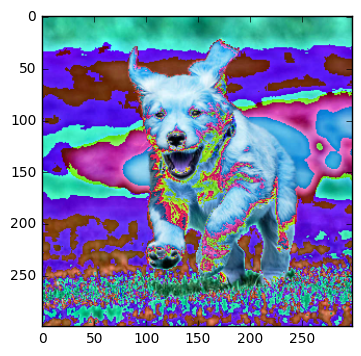

In [5]:
img_names = img_to_caps.keys()
for i,img_fname in enumerate(img_names):
    path = os.path.join('data/Flicker8k_Dataset/flickr8k', img_fname)
#     path = 'dog.jpg'
    img = cv2.resize(cv2.imread(path), (299, 299)).astype(np.float32)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    plt.imshow(img[0])
    break

In [6]:
prediction = img_model.predict(img)
decode_predictions(prediction)

[[('n02098286', 'West_Highland_white_terrier', 0.66573077),
  ('n02094114', 'Norfolk_terrier', 0.038886856),
  ('n02099601', 'golden_retriever', 0.035261311),
  ('n02094258', 'Norwich_terrier', 0.033422586),
  ('n02096177', 'cairn', 0.02016177)]]

In [20]:
from keras.layers import RepeatVector, Input
from keras.layers.wrappers import TimeDistributed
from keras.models import Model

m_input = img_model.inputs[0]
m_output = RepeatVector(16)(img_model.outputs[0])

model = Model(input=m_input, output=m_output)

In [22]:
prediction = model.predict(img)
print(prediction.shape)
# decode_predictions(prediction)

(1, 16, 1000)
